In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
#converting the txt file to csv
#df = pd.read_csv("~/Downloads/4-1/TIME SERIES/airline-passengers.txt")
#df.to_csv("~/Downloads/4-1/TIME SERIES/airline-passengers.csv", index=None)

In [3]:
data = "~/Downloads/4-1/TIME SERIES/airline-passengers.csv"
df = pd.read_csv(data)
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Passengers')

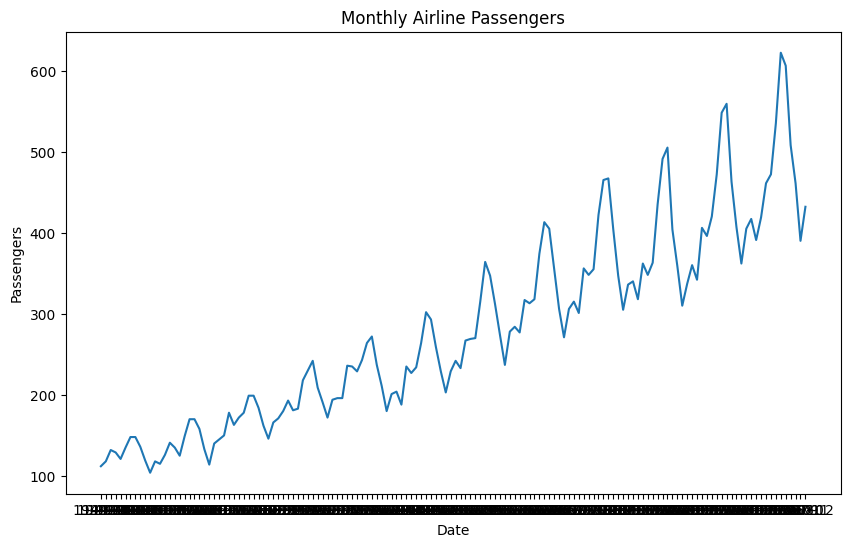

In [5]:
#plottng monthly passengers vs time

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Passengers'], label = 'Monthly Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


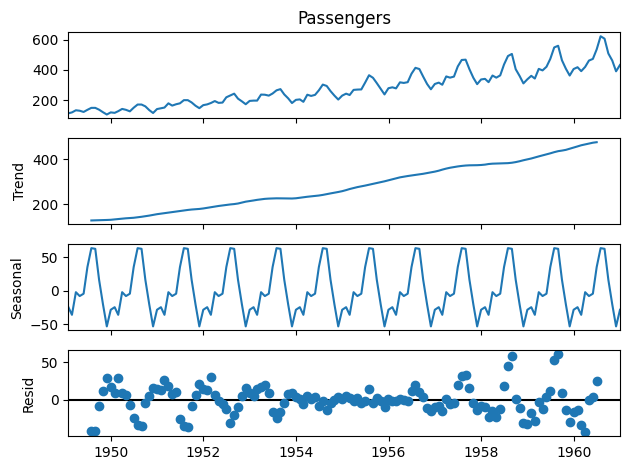

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('Month', inplace=True)
monthly_data = df['Passengers'].resample('ME').sum()
decomposition = seasonal_decompose(monthly_data, model='additive')
fig = decomposition.plot()

#residue is non-stationary

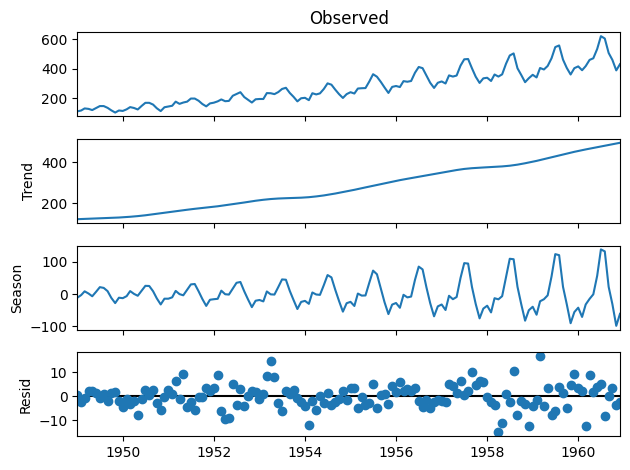

In [6]:
df.set_index('Month', inplace=True)
monthly_data = df['Passengers'].resample('ME').sum()

stl = STL(df)
res= stl.fit()

res.plot()
plt.show()

# done to observe difference between seasonal_decompose and STL
# observation - the residue changes along with the amplitude of the seasonal component 

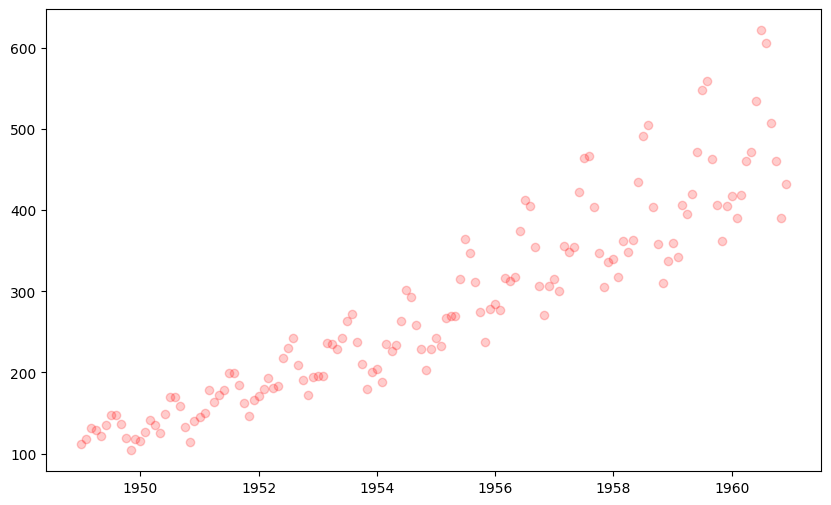

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(df['Passengers'], marker = 'o', alpha = 0.2, linestyle = 'none', color = 'red', label = 'Passenger data')
plt.show()

In [9]:
df['MA6'] = df['Passengers'].rolling(window=6).mean()
df['MA24'] = df['Passengers'].rolling(window=24).mean()
df['EMA6'] = df['Passengers'].ewm(span=6, adjust=False).mean()
df['SMA'] = df['Passengers'].rolling(window=6, center=True).mean()

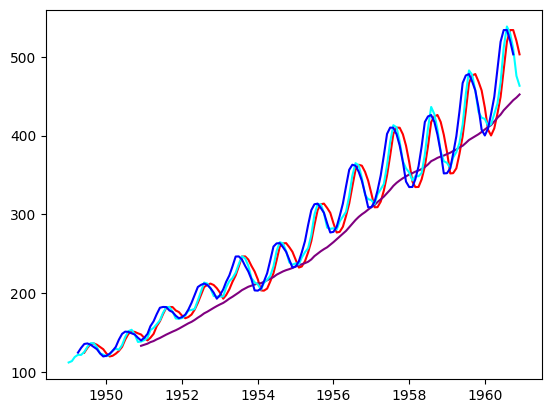

In [10]:
plt.plot(df['MA6'], label='6-month Moving Average', color='red')
plt.plot(df['MA24'], label='24-month Moving Average', color='purple')
plt.plot(df['EMA6'], label='6-month exponenetial Moving Average', color='cyan')
plt.plot(df['SMA'], label='6-month symmetric Moving Average', color='blue')

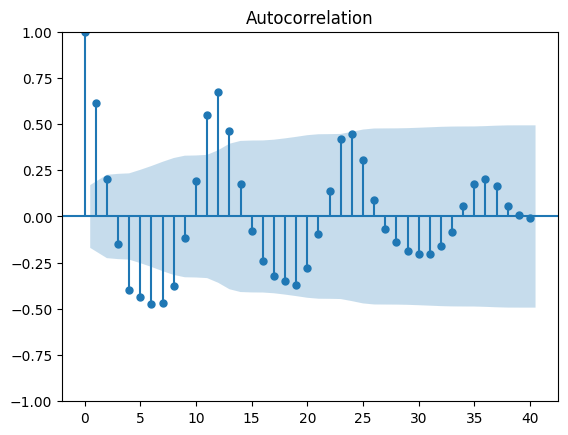

<Figure size 600x400 with 0 Axes>

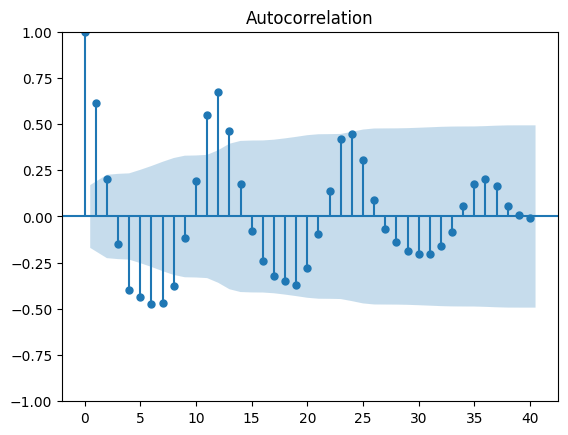

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

df['Trend'] = df['Passengers'].rolling(window=12, center=True).mean()
df['Detrended'] = df['Passengers'] - df['Trend']

seasonal_mean = df.groupby(df.index.month)['Detrended'].mean()

df['Seasonal'] = df.index.month.map(seasonal_mean)

df['Seasonally adjusted'] = df['Passengers'] - df['Trend'] - df['Seasonal']

seasonally_adjusted_data = df['Seasonally adjusted'].dropna()

plt.figure(figsize=(6, 4))
plot_acf(seasonally_adjusted_data, lags=40)